KAGGLE房價練習

In [ ]:
import pandas as pd
import numpy as np

In [6]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [7]:
print("Train data shape",train.shape)
print("Test data shape",test.shape)

Train data shape (1460, 81)
Test data shape (1459, 80)


In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
"""
· SalesPrice——以美元計算的房地產的售價。這是你要預測的目標變量。
· MSSubClass——房地產建築類別
· MSZoning ——一般的地區區分類
· LotFrontage——與房地產相距的街道英尺距離（？）
· LotArea -用平方英尺表示的大小
· Stret——所在道路的類型
· Alley-所在巷信道的類型
· LotShape -----房地產形狀的分類
· LandContour-----土地的平整性
· Utilities-----可用的實用工具類型
· LotConfig——大小配置
"""

'\n· SalesPrice——以美元計算的房地產的售價。這是你要預測的目標變量。\n· MSSubClass——房地產建築類別\n· MSZoning ——一般的地區區分類\n· LotFrontage——與房地產相距的街道英尺距離（？）\n· LotArea -用平方英尺表示的大小\n· Stret——所在道路的類型\n· Alley-所在巷信道的類型\n· LotShape -----房地產形狀的分類\n· LandContour-----土地的平整性\n· Utilities-----可用的實用工具類型\n· LotConfig——大小配置\n'

In [10]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize']=(10,6)

In [11]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.88287575977


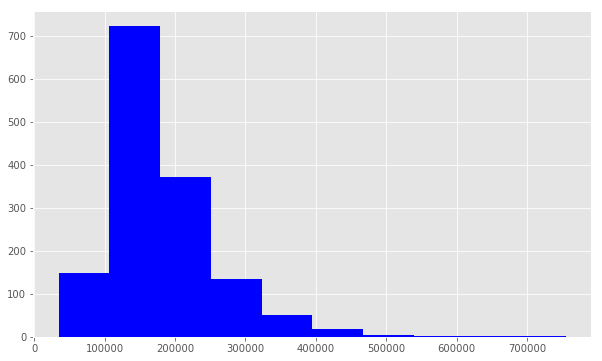

In [12]:
print("Skew is:",train.SalePrice.skew())
#hist畫出直方圖
plt.hist(train.SalePrice,color='blue')
plt.show()

Skew is: 0.121335062205


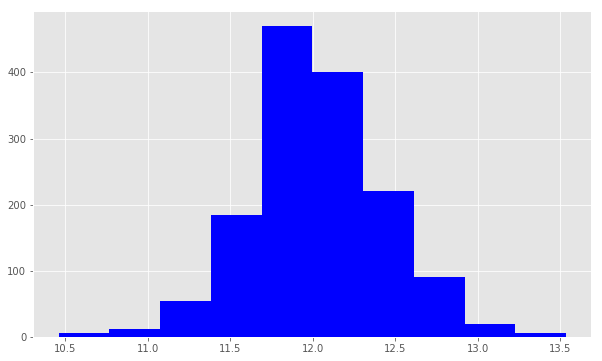

In [13]:
target=np.log(train.SalePrice)
print("Skew is:",target.skew())
plt.hist(target,color='blue')
plt.show()

In [14]:
#select_dtypes()方法返回與給定數據類型匹配的列的集合
numeric_features=train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [15]:
#DataFrame.corr()方法可以給出兩個列之間的相關性
corr=numeric_features.corr()
print(corr["SalePrice"].sort_values(ascending=False)[:5],'\n')
print(corr["SalePrice"].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [16]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

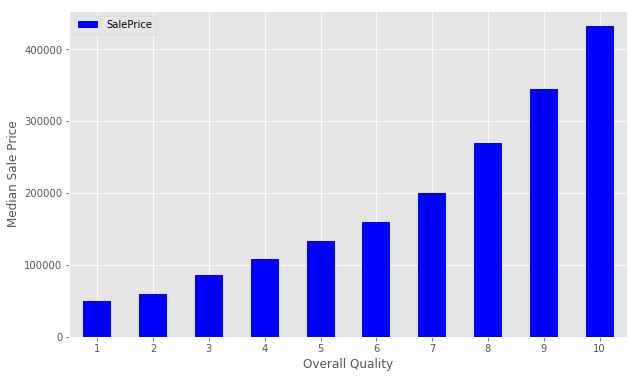

In [17]:
quality_pivot=train.pivot_table(index='OverallQual',values='SalePrice',aggfunc=np.median)
quality_pivot.plot(kind='bar',color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

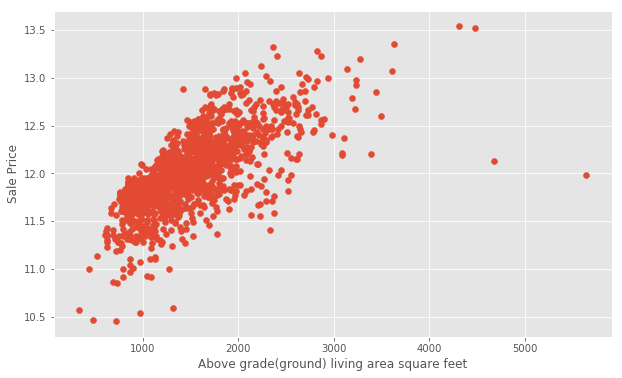

In [18]:
plt.scatter(x=train['GrLivArea'],y=target)
plt.ylabel("Sale Price")
plt.xlabel("Above grade(ground) living area square feet")
plt.show()

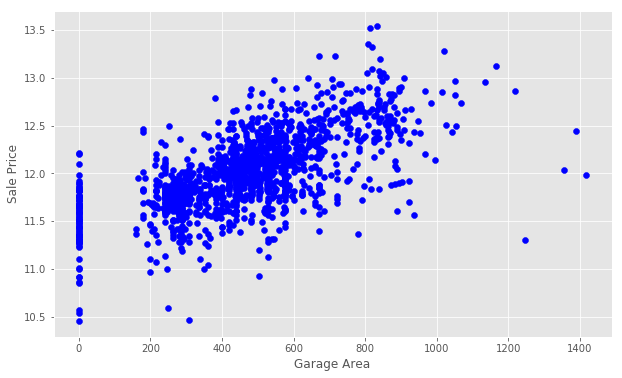

In [19]:
plt.scatter(x=train['GarageArea'],y=target,color='blue')
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [20]:
train=train[train['GarageArea']<1200]
#將剔除野值後的數據重新組合成新的數據幀（dataframe）

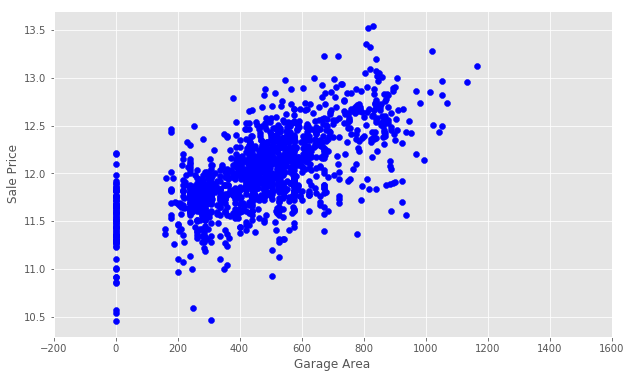

In [21]:
plt.scatter(x=train['GarageArea'],y=np.log(train.SalePrice),color='blue')
plt.xlim(-200,1600)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [22]:
#處理空白值（Handling Null Values）創建一個數據幀DataFrame來查看頂部的空列(top null columns)。 
#將train.isnull().sum()方法鏈接在一起，我們返回一系列每列中的空值的計數。
nulls=pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.cloums=['Null Count']
nulls.index.name='Feature'
nulls

,0
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [23]:
print("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [24]:
categoricals=train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [25]:
print("Original:\n")
print(train.Street.value_counts(),"\n")

Original:

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In [26]:
Street列的唯一值（unique values）是Pave和Grvl，用來描述到房屋道路的類型。
在訓練集中，5所房屋有碎石路。
我們的模型需要數字數據，因此應用one-hot encoding法將Street數據轉化為布爾列。
創建一個新的列enc_street，pd.get_dummies()方法可以完成將數據轉換成布爾量的工作。
如前文所述，需要對train數據和test數據進行同樣的處理。

SyntaxError: invalid character in identifier (<ipython-input-26-024367168e6a>, line 1)

In [27]:
train['enc_street']=pd.get_dummies(train.Street,drop_first=True)
test['enc_street']=pd.get_dummies(test.Street,drop_first=True)

In [28]:
print('Encoded: \n')
print(train.enc_street.value_counts())

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


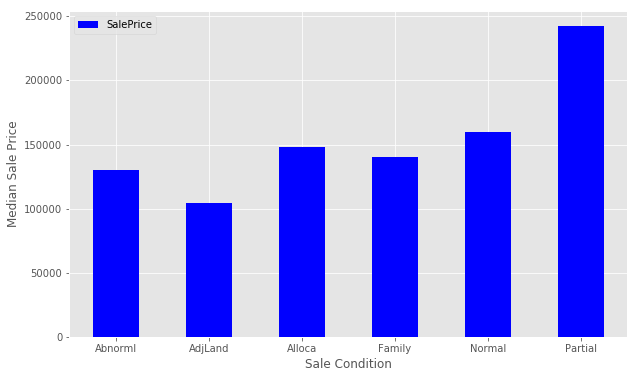

In [29]:
condition_pivot=train.pivot_table(index='SaleCondition',
                                  values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar',color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [30]:
def encode(x): return 1 if x=='Partial' else 0
train['enc_condition']=train.SaleCondition.apply(encode)
test['enc_condition']=test.SaleCondition.apply(encode)

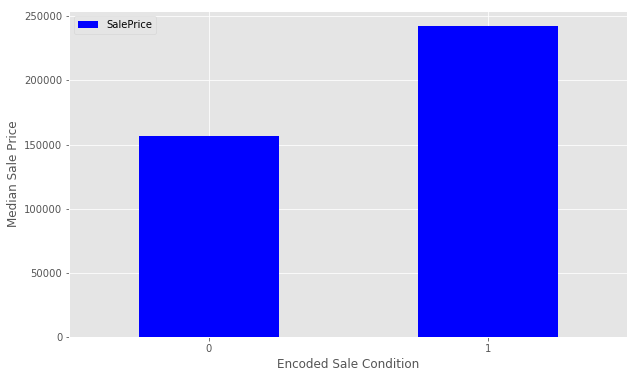

In [31]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [32]:
data=train.select_dtypes(include=[np.number]).interpolate().dropna()
#用均值對缺失值賦值，並用data保存，這個過程稱為插值。
#DataFrame.interpolate()方法可以簡單方便的實現這個過程。
#但是應用此方法創建的模型，可能在處理新數據時達不到最優性能。

In [33]:
sum(data.isnull().sum() != 0)

0

In [40]:
y=np.log(train.SalePrice)
X=data.drop(['SalePrice','Id'],axis=1)
#X_train：用作訓練數據的一個子集
#X_test： 用作測試數據的一個子集--會被用來測試訓練好的模型
#y_train：與 X_train對應的目標變量SalesPrice
#y_test： 與 X_test對應的目標變量SalesPrice

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.33)
#第一個參數值X表示一組預測數據集，y是目標變量。
#接下來設置random_state=42，它提供了可重複的結果，
#因為sci-kit learn的train_test_split函數會隨機的劃分數據。
#test_size參數告訴函數樣本的佔比。在這個例子中，約33%的數據被用作測試集。

In [48]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [50]:
model=lr.fit(X_train,y_train)
print("R^2 is: \n", model.score(X_test,y_test))
#這標誌着我們的特徵變量能解釋目標變量中約89％的差異

R^2 is: 
 0.888247770926


In [52]:
predictions = model.predict(X_test)
#接下來，我們來關注下方均根差RMSE。 為此，我們用創建好的模型對測試數據集進行預測。
#model.predict()在訓練模型之後使用這個方法，它會返回給定一組預測變量的預測列表。
#函數mean_squared_error需要兩個數組來計算RMSE。

In [55]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))
#RMSE這個值比r平方值更直觀，它表示我們的預測值和實際值之間的距離。

RMSE is: 
 0.0178417945196


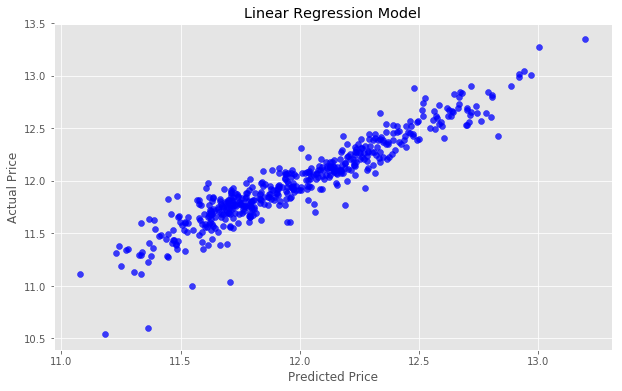

In [56]:
actual_values=y_test
plt.scatter(predictions,actual_values,alpha=0.75,color='b')
#alpha helps to show overlapping data
#現在再次實例化模型，嶺正則化(Ridge Regularization)模型使用一個參數α，用來控制正則化的強度。
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

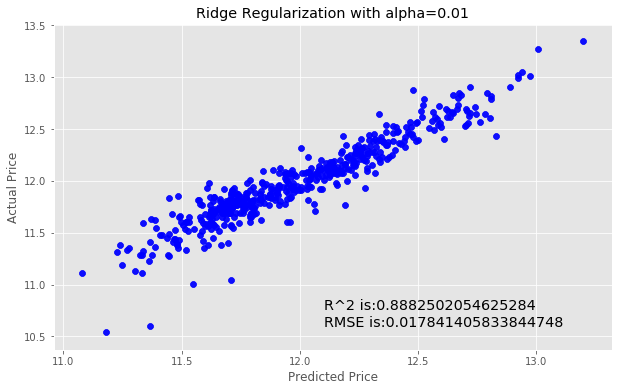

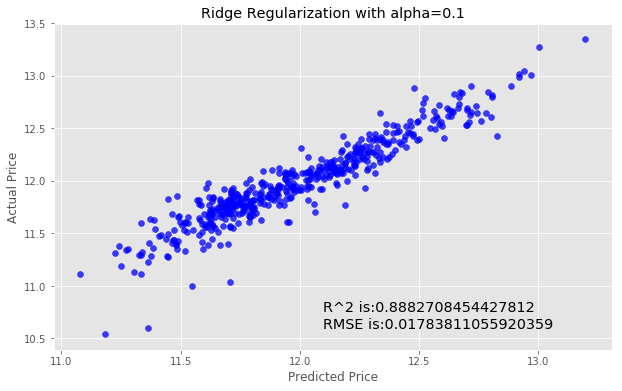

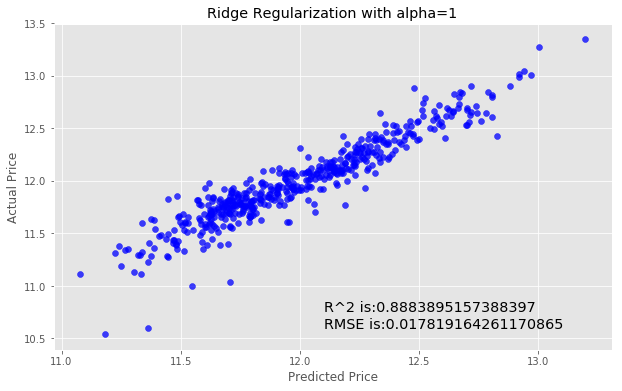

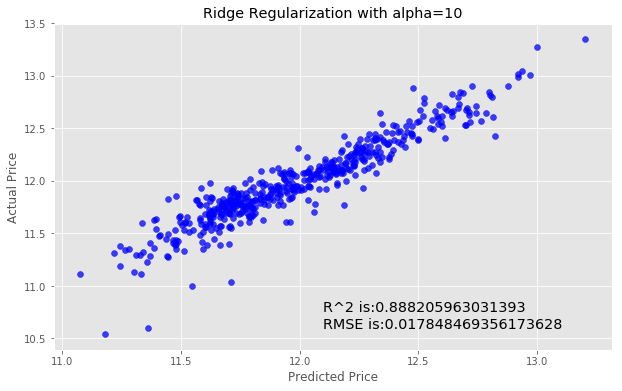

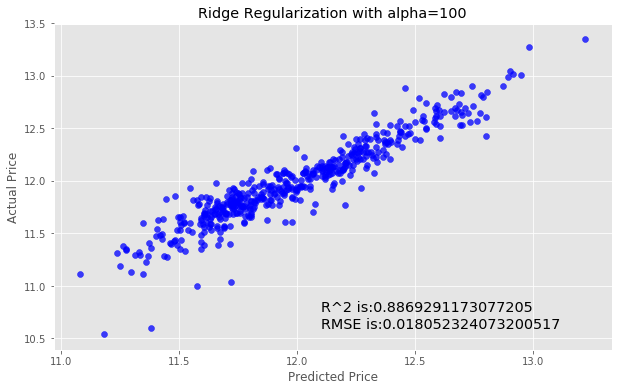

In [59]:
for i in range(-2,3):
    alpha=10**i #次方
    rm=linear_model.Ridge(alpha=alpha)
    ridge_model=rm.fit(X_train,y_train)
    preds_ridge=ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge,actual_values,alpha=0.75,color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha={}'.format(alpha))
    overlay='R^2 is:{}\nRMSE is:{}'.format(
    ridge_model.score(X_test,y_test),
    mean_squared_error(y_test,preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()


In [65]:
#使用DataFrame.to_csv()創建一個csv來提交。第一列必須包含來自測試數據的ID。
submission=pd.DataFrame()
submission['Id']=test.Id

In [70]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,enc_street,enc_condition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,1,0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,1,0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,1,0
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2010,WD,Normal,1,0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,1,2010,WD,Normal,1,0


In [67]:
feats=test.select_dtypes(
    include=[np.number]).drop(['Id'],axis=1).interpolate()

In [73]:
predictions=model.predict(feats)

In [81]:
#現在把預測轉換成正確的形式。記住，要反向使用log()，執行exp()。
#因此，用np.exp()來做預測，因為之前已經取了對數。
final_predictions=np.exp(predictions)

In [82]:
print("Original predictions are: \n",predictions[:5],"\n")
print("Final predictions are: \n",final_predictions[:5],"\n")

Original predictions are: 
 [ 11.76725362  11.71929504  12.07656074  12.20632678  12.11217655] 

Final predictions are: 
 [ 128959.49172586  122920.74024361  175704.82598102  200050.83263755
  182075.46986404] 



In [83]:
submission['SalePrice']=final_predictions
submission.head()

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864


In [84]:
submission.to_csv('submission1.csv',index=False)
#設置index= False，否則Pandas會為我們再創建一個新的索引